In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('sms_raw_data.csv', encoding= 'ISO-8859-1', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#dropped 2, 3, and 4th column 
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"] , inplace=True)

In [5]:
df.rename(columns={"v1":"target", "v2":"text"} , inplace=True)
df.sample(5)

,target,text
5303,ham,"I can. But it will tell quite long, cos i have..."
4791,ham,Gd luck 4 ur exams :-)
2983,ham,He said that he had a right giggle when he saw...
545,ham,Then any special there?
5043,ham,"Dunno, my dad said he coming home 2 bring us o..."


In [6]:
# label incoding the target column 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["target"] = LE.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
# remove duplicated rows 
df.drop_duplicates(keep="first" , inplace=True)

In [10]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

## eda

In [11]:
import matplotlib as plt
import nltk


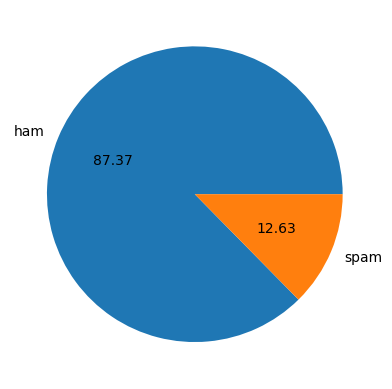

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
# %pip install nltk
# nltk.download("punkt")
# nltk.download('stopwords')

In [14]:
df["num_characters"] = df["text"].apply(len)

In [15]:
df["num_of_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [16]:
df["num_of_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [17]:
df.sample(10)

,target,text,num_characters,num_of_words,num_of_sentences
748,0,Is there a reason we've not spoken this year? ...,101,23,2
3849,0,I to am looking forward to all the sex cuddlin...,71,15,1
417,1,FREE entry into our å£250 weekly competition j...,107,21,2
2069,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",162,29,1
146,1,FreeMsg Why haven't you replied to my text? I'...,159,35,3
2172,0,Yavnt tried yet and never played original either,48,8,1
1068,1,Someone U know has asked our dating service 2 ...,134,28,4
3948,0,HMM yeah if your not too grooved out! And im l...,83,19,2
1722,0,Thought praps you meant another one. Goodo! I'...,63,13,3
4995,0,Happy new year. Hope you are having a good sem...,51,11,2


In [18]:
df[['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
df[df['target'] == 0][['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
#spam
df[df['target'] == 1][['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## text tranformation / data preprocessing 
1. lower case
2. tokenisation
3. removing special characters 
4. removing stopwords and panctutation
5. stemming 

In [21]:
from nltk.corpus import stopwords
# stopwords.words("english")

import string
# string.punctuation

from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [22]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    # stemming the words 
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [23]:
transform_text("hi , HOW are you 20%%%%%%%% b %%%%%% %5 910 (_!) doing , you are the best person dancing in the world ")

'hi 20 b 5 910 best person danc world'

In [24]:
df["transformed_text"] = df["text"].apply(transform_text)

In [25]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [26]:
# % pip install wordcloud

In [27]:
# creating word cloud for visualization
from wordcloud import WordCloud
wc = WordCloud(min_font_size=10, background_color="white")

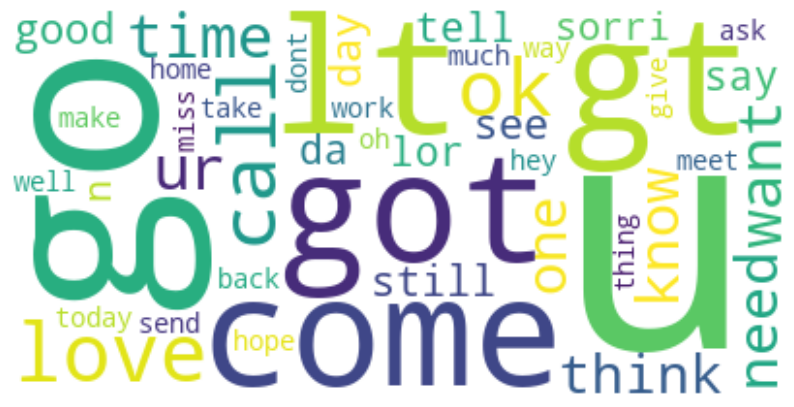

In [28]:
# == 0 for ham 
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

plt.figure(figsize=(10,10))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

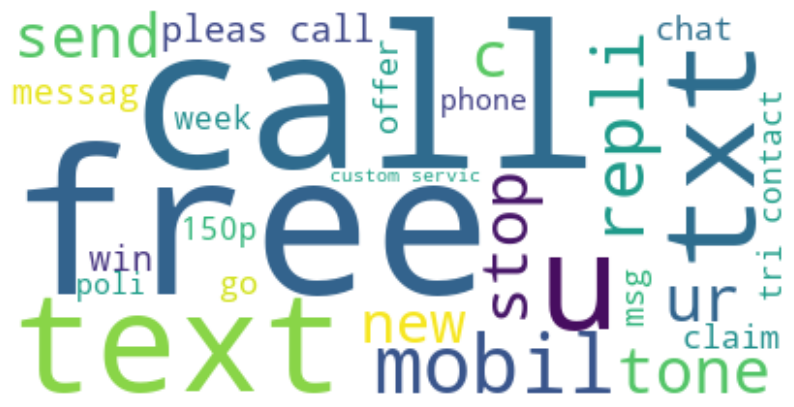

In [29]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

plt.figure(figsize=(10,10))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
spam_word_count = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_word_count.append(word)

print("spam word count : " + str(len(spam_word_count)))

ham_word_count = []
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_word_count.append(word)

print("ham word count : " + str(len(ham_word_count)))

spam word count : 9939
ham word count : 35404


In [31]:
from collections import Counter
df_spam_wc = pd.DataFrame(Counter(spam_word_count).most_common(30))
df_ham_wc = pd.DataFrame(Counter(ham_word_count).most_common(30))

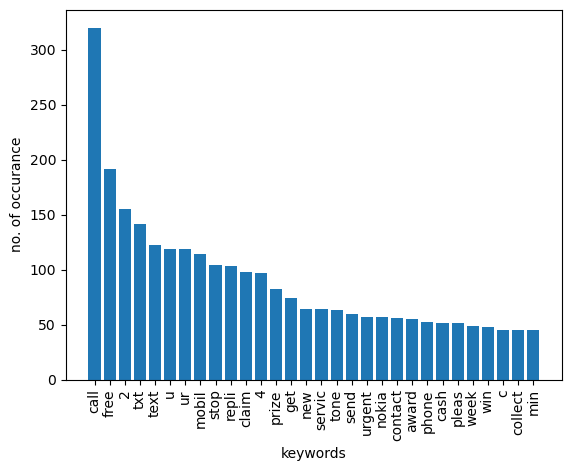

In [32]:
plt.bar(pd.DataFrame(Counter(spam_word_count).most_common(30))[0] , pd.DataFrame(Counter(spam_word_count).most_common(30))[1])
plt.xticks(rotation=90, ha='center')
plt.xlabel("keywords")
plt.ylabel("no. of occurance")
plt.show()

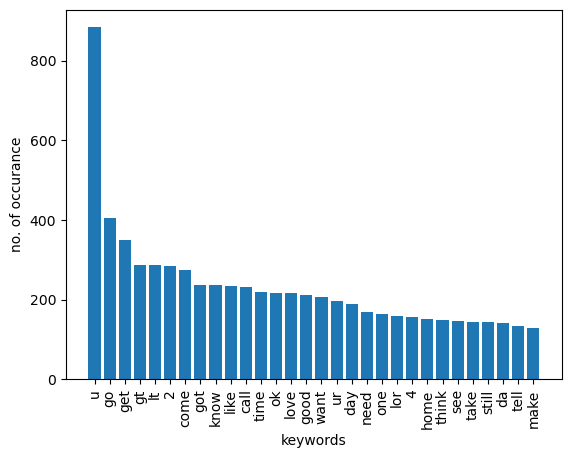

In [33]:
plt.bar(pd.DataFrame(Counter(ham_word_count).most_common(30))[0] , pd.DataFrame(Counter(ham_word_count).most_common(30))[1])
plt.xticks(rotation=90, ha='center')
plt.xlabel("keywords")
plt.ylabel("no. of occurance")
plt.show()

In [34]:
# model build

In [35]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

x = cv.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values

x2 = tfidf.fit_transform(df["transformed_text"]).toarray()
y2 = df["target"].values

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x2,y2,test_size=0.2,random_state=2)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
comnb = ComplementNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [38]:
classifiers = {
    'SVC' : svc,
    'KN' : knc, 
    'GNB' : gnb,
    'MNB': mnb, 
    'BNB': bnb,
    'COMNB': comnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc
}

In [39]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [40]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  GNB
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  COMNB
Accuracy -  0.9100580270793037
Precision -  0.6076555023923444
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


In [41]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
3,MNB,0.970986,1.000000
4,BNB,0.983559,0.991870
8,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,LR,0.958414,0.970297
6,DT,0.930368,0.817308
5,COMNB,0.910058,0.607656
2,GNB,0.869439,0.506849


In [42]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
voting = VotingClassifier(estimators=[('SVC' , svc), ('MNB' , mnb), ('BNB' , bnb)], voting="soft")
voting.fit(X_train , Y_train)
y_pred_voting = voting.predict(X_test)

In [44]:
print("Accuracy",accuracy_score(Y_test,y_pred_voting))
print("Precision",precision_score(Y_test,y_pred_voting))

Accuracy 0.9835589941972921
Precision 1.0


In [45]:
import pickle
pickle.dump(tfidf , open("vectorizer.pkl" , "wb"))
pickle.dump(voting , open("model.pkl", "wb"))

In [46]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred2))
print("Precision",precision_score(Y_test,y_pred2))

Accuracy 0.9709864603481625
Precision 1.0


In [47]:
pickle.dump(mnb , open("mnb_model.pkl", "wb"))